### Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append('../..')
from definitions import EXPIREMENTS_DIR

### Load data frames

In [2]:
def load_dataframes() -> pd.DataFrame:

    dataframes = []

    for filename in os.listdir(EXPIREMENTS_DIR):

        csv_path = os.path.join(EXPIREMENTS_DIR, filename, 'history.csv')

        if os.path.exists(csv_path):
            csv_file = pd.read_csv(csv_path)
            csv_file['experiment'] = filename

            dataframes.append(csv_file)
    
    return pd.concat(dataframes)

In [3]:
dfs = load_dataframes()

### Plotting

In [4]:
def plot_folds(dfs: pd.DataFrame, metric: str):

    plot_df = dfs[dfs['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[[metric]].reset_index()
    sns.barplot(data=plot_df, x='fold', y=metric, hue='experiment')

In [5]:
def plot_mean(dfs : pd.DataFrame,metric : str):
    
    plot_df = dfs[dfs['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[[metric]].reset_index()
    plot_df = plot_df.drop(columns=['fold']).groupby(by='experiment').mean().reset_index()

    ax = sns.barplot(data=plot_df, x='experiment', y=metric)

    ax.tick_params(axis="x", rotation=90)

    for i in ax.containers:
        ax.bar_label(i,)

- comparing different fold results

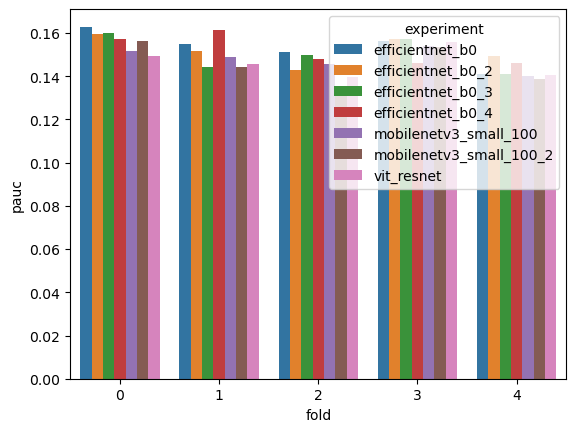

In [6]:
plot_folds(dfs, 'pauc')

- comparing the mean

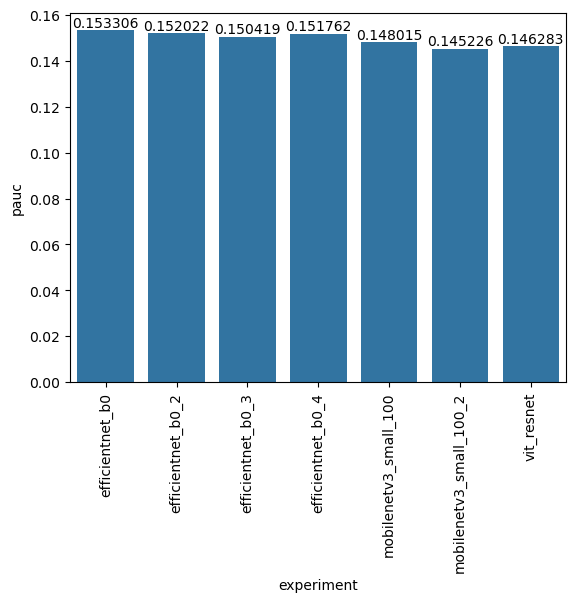

In [7]:
plot_mean(dfs, 'pauc')

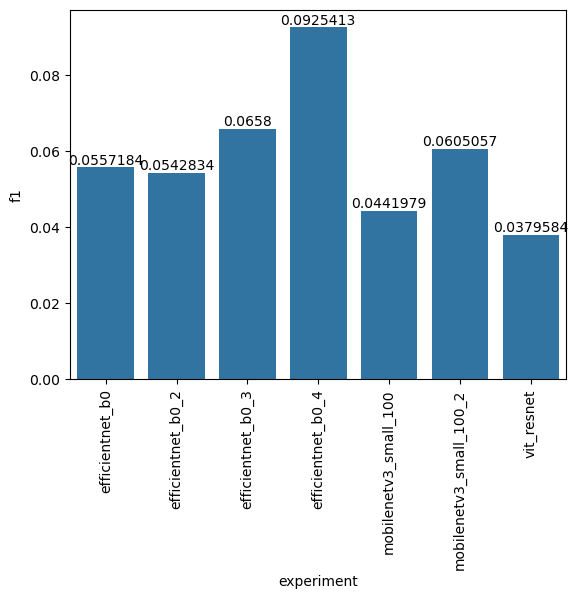

In [8]:
plot_mean(dfs, 'f1')

In [10]:
dfs[(dfs['split'] == 'val') & (dfs['experiment'] == 'vit_resnet')].groupby(by=['experiment', 'fold']).max()[['pauc']].reset_index()

,experiment,fold,pauc
0,vit_resnet,0,0.149473
1,vit_resnet,1,0.145707
2,vit_resnet,2,0.139630
3,vit_resnet,3,0.155901
4,vit_resnet,4,0.140707
